# Subgraph Matching and Counting

In [4]:
import networkx as nx
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statistics as sts
from networkx.algorithms import isomorphism
import itertools

In [27]:
def plot_graph(graph):
    """Plots a directed graph."""
    pos = nx.spring_layout(graph, seed=42)  # Positions for all nodes
    nx.draw(graph, pos, with_labels=True, node_size=300, node_color="skyblue", font_size=10, arrowsize=10)
    plt.show()

### Graph Statistics

In [28]:
def show_graph_stats(G):
    triangles = nx.triangles(G).values()
    degrees = dict(nx.degree(G)).values()
    number_of_nodes = G.number_of_nodes()

    try:
        average_clustering = nx.average_clustering(G)
    except:
        average_clustering = 0

    # try catch for core
    try:
        core = nx.core_number(G)
    except:
        core = 0

    print("Nodes: ", 
          number_of_nodes)
    print("Edges: ", 
          G.number_of_edges())
    print("Density: ", 
          nx.density(G))
    print("Max degree: ", 
          max(degrees))
    print("Min degree: ", 
          min(degrees))
    print("Average degree: ", 
          sts.mean(degrees))
    print("Assortativity: ", 
          nx.degree_assortativity_coefficient(G))
    print("Number of triangles: ", 
          sum(triangles) / 3)
    print("Average number of triangles: ", 
          average_clustering * number_of_nodes)
    print("Average clustering: ", 
          average_clustering)
    print("Maximum number of triangles: ", 
          max(triangles))
    print("Average clustering coefficient: ", 
          average_clustering)
    print("Fraction of closed triangles: ", 
          nx.transitivity(G))
    print("Maximum k-core: ", 
          max(core.values()))

In [29]:
def subgraph_count(graph, subgraph):
    """
    Count the occurrences of a specific subgraph within a given graph.

    Parameters:
        graph (NetworkX graph): The input graph in which occurrences are counted.
        subgraph (NetworkX graph): The subgraph whose occurrences are being counted.

    Returns:
        int: The number of occurrences of the specified subgraph within the given graph.
    """
    # Initialize counter to keep track of occurrences
    count = 0

    # Iterate through all combinations of nodes in the graph
    # with the same size as the given subgraph
    for nodes in itertools.combinations(graph.nodes(), subgraph.number_of_nodes()):
        # Create a subgraph from the current combination of nodes
        g = graph.subgraph(nodes) # node induced subgraph

        # Check if the current subgraph is isomorphic to the specified subgraph
        if nx.is_isomorphic(g, subgraph):
            # If isomorphic, increment the counter
            count += 1
    
    # Return the count of occurrences
    return count

In [6]:
def read_graph_from_edge_list(file_path):
    """Reads a directed graph from an edge list file."""
    G = nx.DiGraph()
    with open(file_path, 'r') as file:
        for line in file:
            edge = line.strip().split()
            if len(edge) == 2:
                source, target = edge
                G.add_edge(source, target)
    return G

In [7]:
# Directory containing the edge list files
directory = '../data/motifs/'

# List to store the graphs
motifs = []

# Iterate over each file in the directory
for i in range(1, 14):  # Assuming files are named file1.edges, file2.edges, ..., file13.edges
    file_name = f"motif{i}.edges"
    file_path = os.path.join(directory, file_name)
    if os.path.exists(file_path):
        # Read the graph from the edge list file
        motif = read_graph_from_edge_list(file_path)
        motifs.append(motif)
        print(f"Graph {i} added to the list.")
    else:
        print(f"File {file_name} not found.")

Graph 1 added to the list.
Graph 2 added to the list.
Graph 3 added to the list.
Graph 4 added to the list.
Graph 5 added to the list.
Graph 6 added to the list.
Graph 7 added to the list.
Graph 8 added to the list.
Graph 9 added to the list.
Graph 10 added to the list.
Graph 11 added to the list.
Graph 12 added to the list.
Graph 13 added to the list.


Plotting motif 1


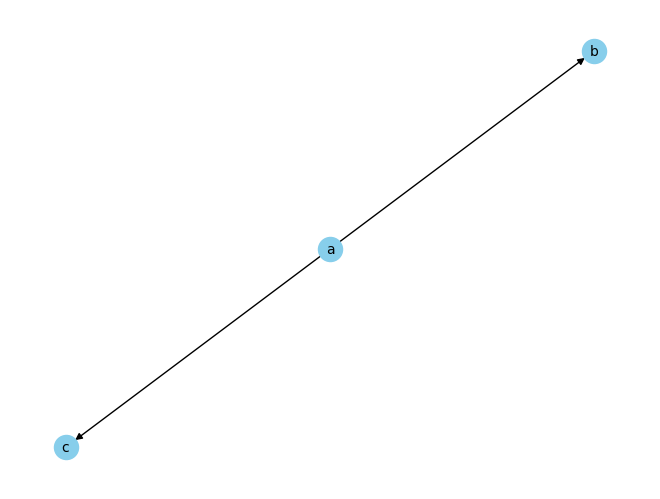

Plotting motif 2


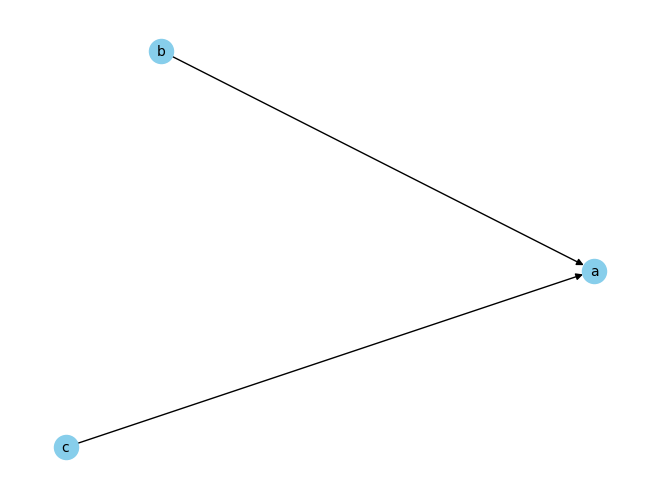

Plotting motif 3


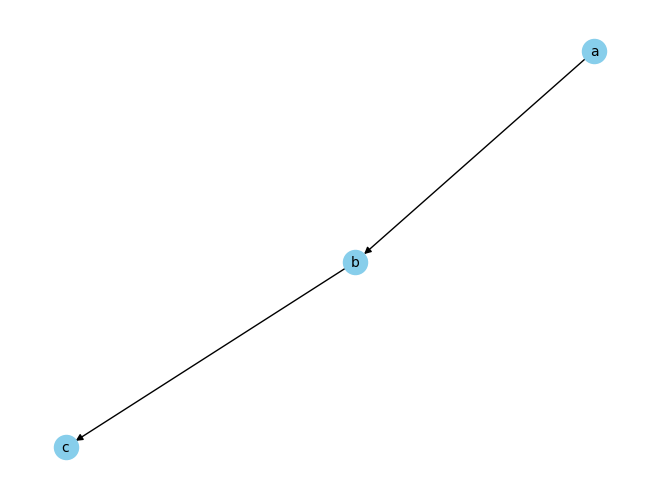

Plotting motif 4


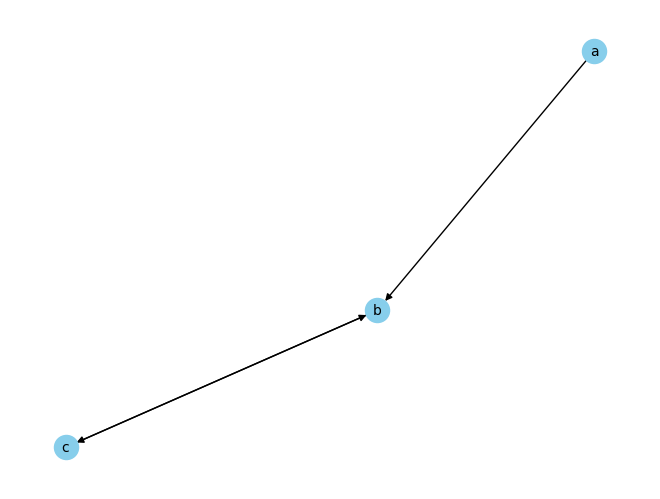

Plotting motif 5


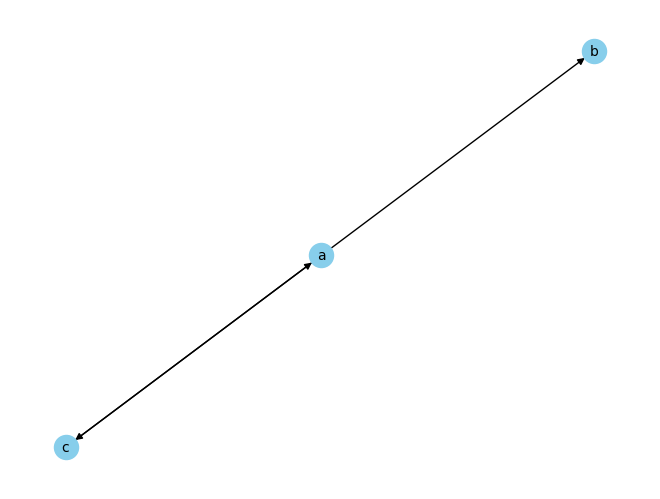

Plotting motif 6


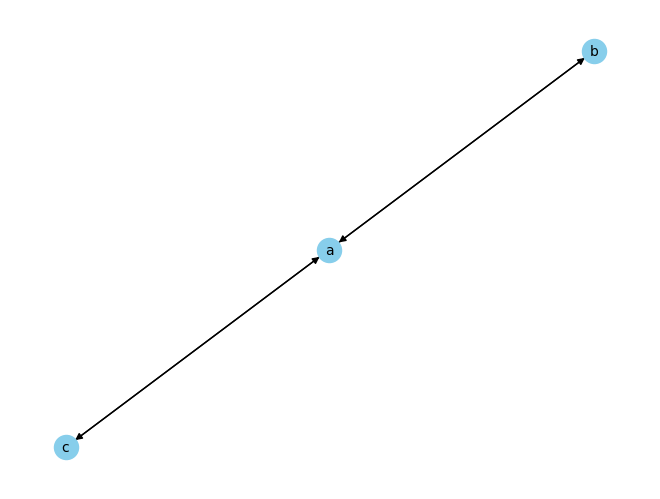

Plotting motif 7


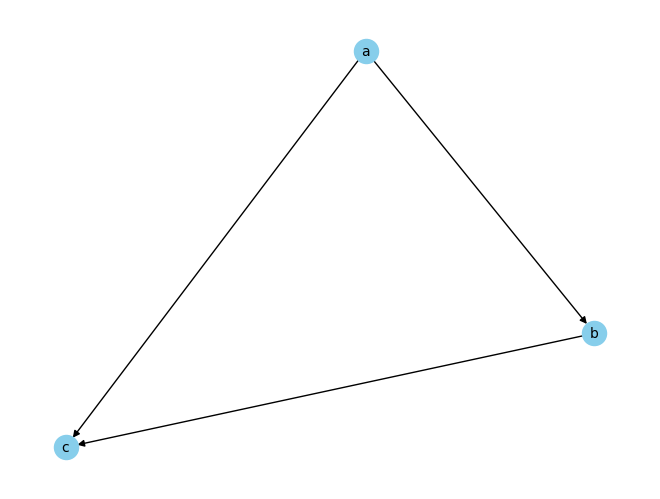

Plotting motif 8


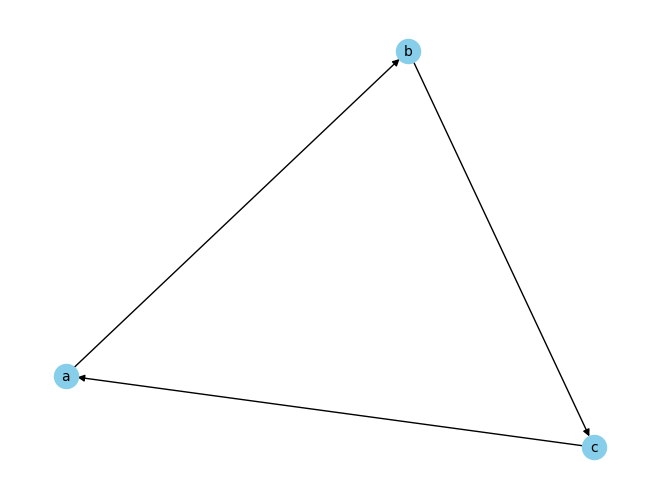

Plotting motif 9


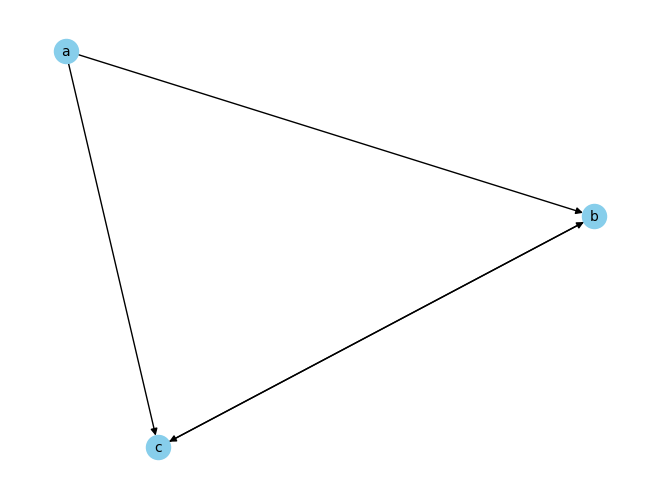

Plotting motif 10


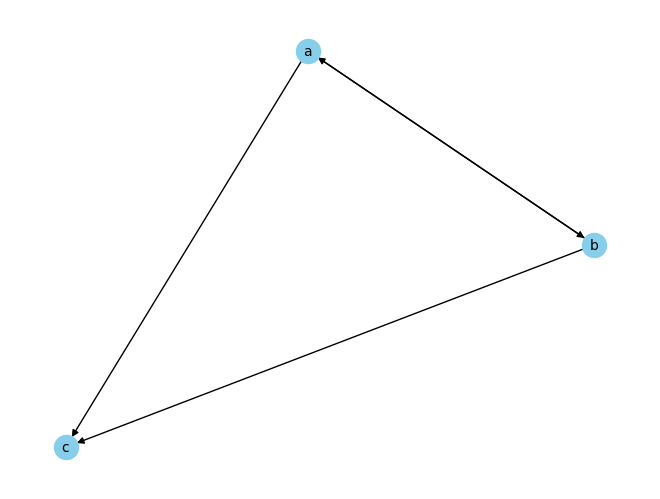

Plotting motif 11


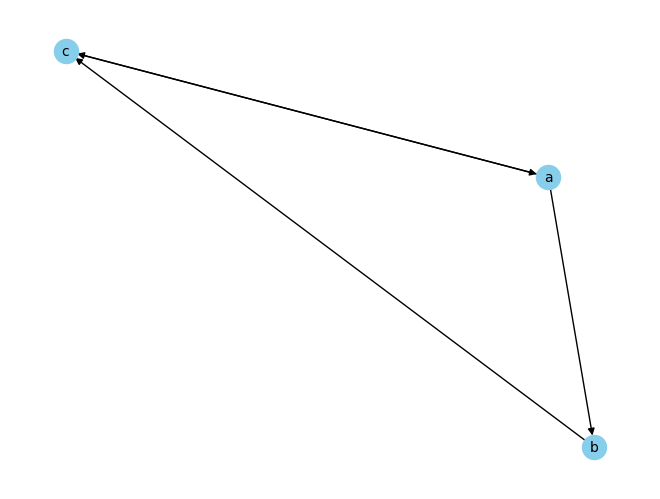

Plotting motif 12


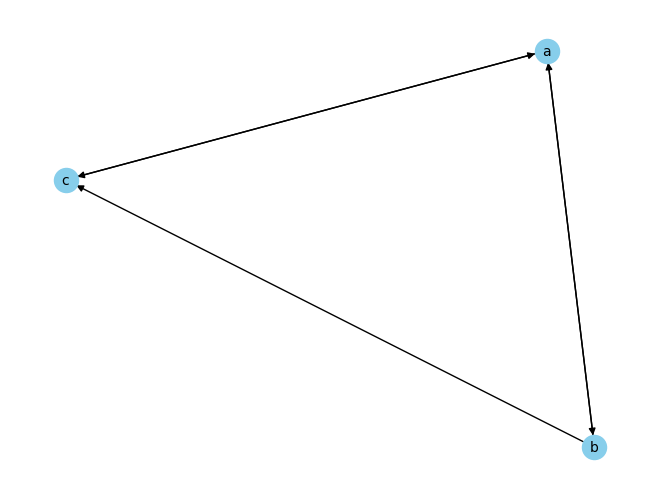

Plotting motif 13


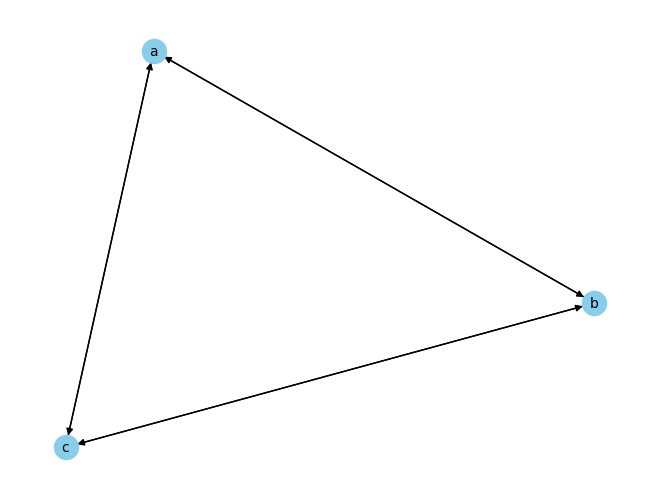

In [32]:
for idx, graph in enumerate(motifs):
    print(f"Plotting motif {idx+1}")
    plot_graph(graph)

In [8]:
twitter_graph = read_graph_from_edge_list('../data/twitter/12831.edges')

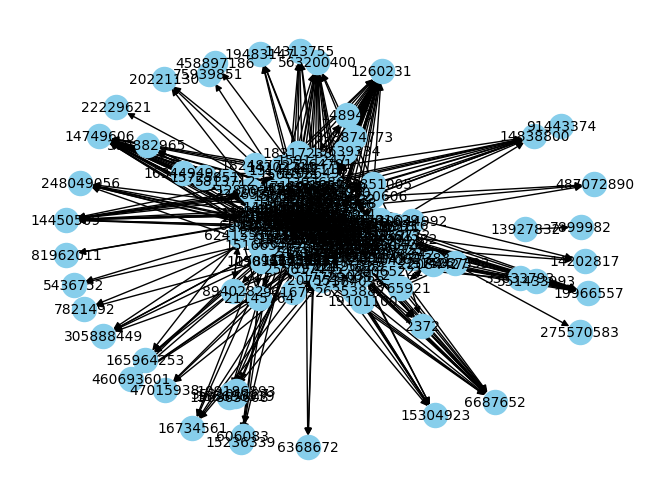

In [34]:
plot_graph(twitter_graph)

In [35]:
for motif in motifs:
    print(f"Subgraph count for motif {motifs.index(motif)+1}: {subgraph_count(twitter_graph, motif)}")

Subgraph count for motif 1: 4405


In [9]:
def generate_subgraphs(graph, size):
    """
    Generate all subgraphs of a given size from a graph.

    Parameters:
        graph (NetworkX graph): The input graph from which subgraphs are generated.
        size (int): The size of subgraphs to generate.

    Returns:
        list: List of subgraphs of the specified size.
    """
    subgraphs = []
    for nodes in itertools.combinations(graph.nodes(), size):
        subgraphs.append(graph.subgraph(nodes))
    return subgraphs

def subgraph_count(graph, motifs):
    """
    Count the occurrences of a list of subgraphs within a given graph.

    Parameters:
        graph (NetworkX graph): The input graph in which occurrences are counted.
        motifs (list): List of subgraphs whose occurrences are being counted.

    Returns:
        dict: A dictionary containing the counts of occurrences for each motif.
    """
    # Generate all subgraphs of the largest size in the list of motifs
    max_size = max([subgraph.number_of_nodes() for subgraph in motifs])
    all_subgraphs = generate_subgraphs(graph, max_size)

    # Initialize a dictionary to store counts for each motif
    motif_counts = {i: 0 for i, motif in enumerate(motifs)}

    # Iterate through all subgraphs and motifs to count occurrences
    for subgraph in all_subgraphs:
        for i, motif in enumerate(motifs):
            if nx.is_isomorphic(subgraph, motif):
                motif_counts[i] += 1

    return motif_counts

In [10]:
counts = subgraph_count(twitter_graph, motifs)
for i, count in counts.items():
    print(f"Subgraph count for motif {i+1}: {count}")

Subgraph count for motif 1: 4405
Subgraph count for motif 2: 6669
Subgraph count for motif 3: 2986
Subgraph count for motif 4: 5198
Subgraph count for motif 5: 7360
Subgraph count for motif 6: 3883
Subgraph count for motif 7: 899
Subgraph count for motif 8: 8
Subgraph count for motif 9: 646
Subgraph count for motif 10: 881
Subgraph count for motif 11: 184
Subgraph count for motif 12: 1071
Subgraph count for motif 13: 691
